## TASK 1
EDA analysis on the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_path='/content/drive/MyDrive/Datasets/HA/train-1.csv'
test_path='/content/drive/MyDrive/Datasets/HA/test.csv'

train_df=pd.read_csv(train_path)
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [ ]:
test_df=pd.read_csv(test_path)
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [ ]:
len(train_df) , len(test_df)

(7352, 2947)

### Data Cleaning

#### 1) Describtion of datas

In [ ]:
# Train data
train_df.describe(include='all')

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAYING
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1407
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.52

In [ ]:
# Test data
test_df.describe(include='all')

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAYING
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,-0.303028,-0.574975,0.529

#### 2) Checking NULL values

In [ ]:
print('Null values in train is {} '.format(train_df.isnull().values.sum()))
print('Null values in test is {} '.format(test_df.isnull().values.sum()))

Null values in train is 0 
Null values in test is 0 


#### 3) Checking of duplicate values

In [ ]:
print('No of duplicates in train: {}'.format(sum(train_df.duplicated())))
print('No of duplicates in test : {}'.format(sum(test_df.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


#### 4) Renaming columns

In [ ]:
import warnings
warnings.filterwarnings("ignore")
cat_cols=[i for i in train_df.columns if train_df[i].dtypes =='object']
num_cols=[i for i in train_df.columns if i not in cat_cols]

In [ ]:
cat_cols 

['Activity']

In [ ]:
num_cols[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [ ]:
cols = train_df.columns
cols = cols.str.replace('[()]','')
cols = cols.str.replace('[-]', '')
cols = cols.str.replace('[,]','')

train_df.columns = cols
test_df.columns = cols

In [ ]:
test_df.sample()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
1590,0.265927,-0.023709,-0.096374,-0.964867,-0.942263,-0.926173,-0.964259,-0.936102,-0.919813,-0.919119,-0.559295,-0.777198,0.815516,0.665886,0.822811,-0.940925,-0.999208,-0.999068,-0.996358,-0.961799,-0.934042,-0.905222,-0.207581,-0.442761,-0.131178,-0.228711,0.288745,-0.334152,0.048593,0.240176,-0.229522,0.351896,-0.411655,-0.303326,0.253493,-0.064455,-0.291724,0.886116,-0.876861,-0.835368,...,-0.861217,-1.0,0.08194,-0.148856,-0.640177,-0.919962,-0.935008,-0.919065,-0.95108,-0.947637,-0.919962,-0.996585,-0.904844,-0.14208,-0.948718,0.045641,-0.635609,-0.879948,-0.932022,-0.927244,-0.91402,-0.94946,-0.992214,-0.932022,-0.997189,-0.90444,-0.29269,-0.936508,-0.111555,-0.441286,-0.814468,-0.111136,0.098245,0.327021,-0.234296,0.321739,-0.249633,-0.70958,13,LAYING


### Inferences

In [ ]:
print(train_df.subject.nunique())
print(test_df.subject.nunique())

21
9


#### There is 30 subject which is splitted in the fashion of 70-30 format

In [ ]:
print('There is {} unique activity'.format(train_df.Activity.nunique()))
print(train_df.Activity.unique())

There is 6 unique activity
['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


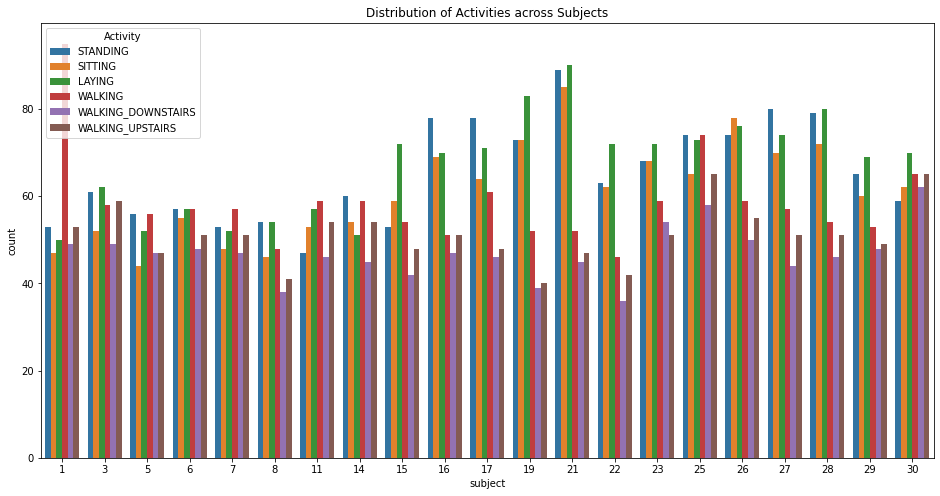

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Distribution of Activities across Subjects')
sns.countplot(x='subject',hue='Activity', data = train_df)
plt.show()

OBSERVATIONS
1.   Plot shows different activities perfomred by 21 subjects
2.   Data doesnt seems to be imbalanced




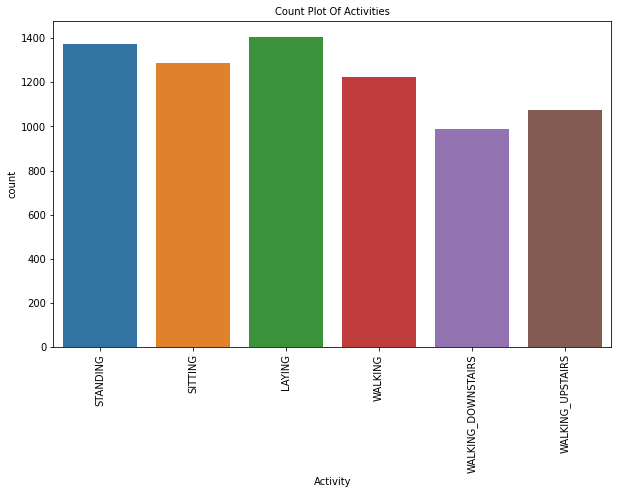

In [ ]:
# Count plot of Activities
plt.figure(figsize=(10,6))
plt.title('Count Plot Of Activities', fontsize=10)
sns.countplot(train_df.Activity)
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS
*   Most of the activity of subjects is laying and the least activity is walking downstairs
*   Basically there is two type of activity
        1. Sataionary Activity
        2. Moving Activity 





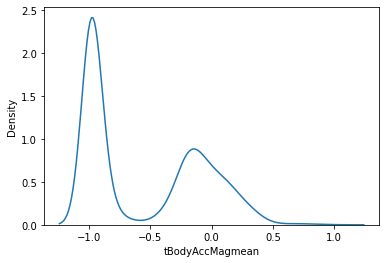

In [ ]:
# Examining Bodies acceleration magnitude mean {tBodyAccMagmean} feature
sns.distplot(train_df['tBodyAccMagmean'],hist=False)

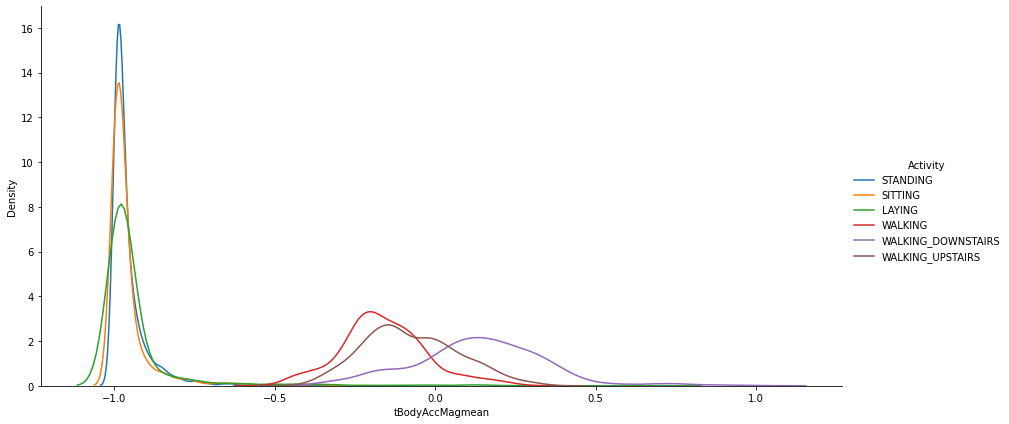

In [ ]:
# Line Plot including all activities

facetgrid = sns.FacetGrid(train_df, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.show()

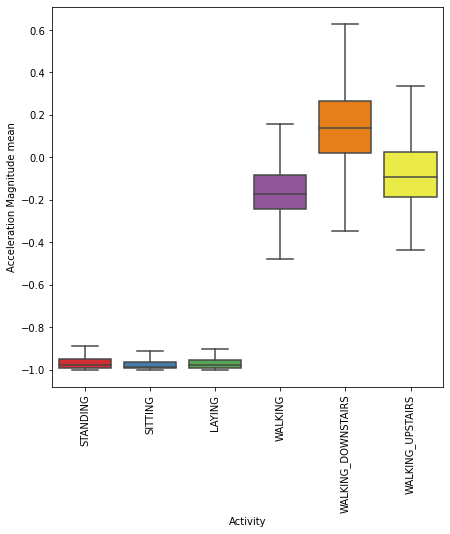

In [ ]:
# Boxplot
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train_df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS
1. Standing , sitting , laying are stationary activities
2. Walking , walking down stairs and upstairs are moving activities
3. There is significant difference in the body acceleration of stationary and moving activities
4. If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
5. If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.


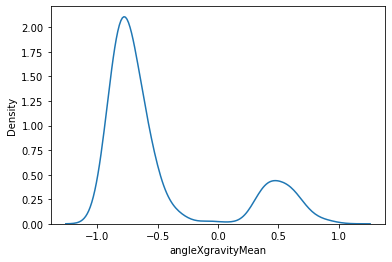

In [ ]:
# Gravity also matters in when distingushing if subject is laying down or in motion
# Exploring gravity feature values

sns.distplot(train_df['angleXgravityMean'],hist=False)

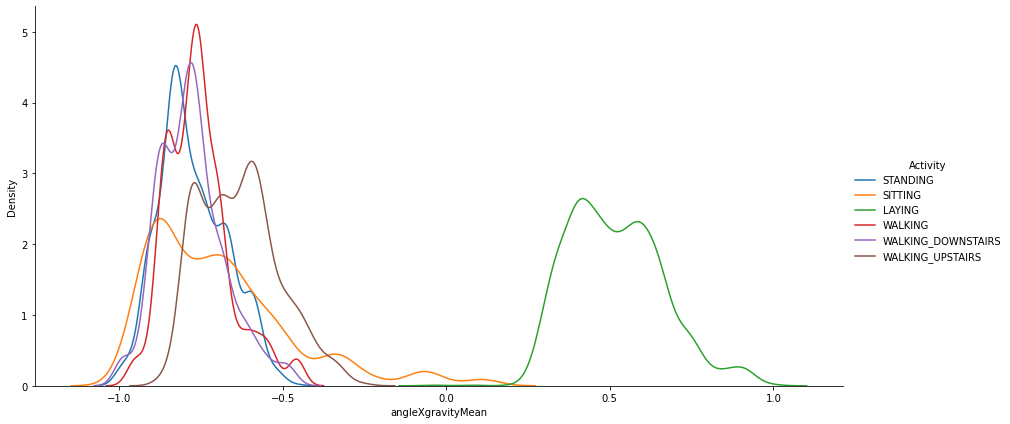

In [ ]:
# Line Plot including all activities of angleXgravityMean

facetgrid = sns.FacetGrid(train_df, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'angleXgravityMean', hist=False).add_legend()
plt.show()

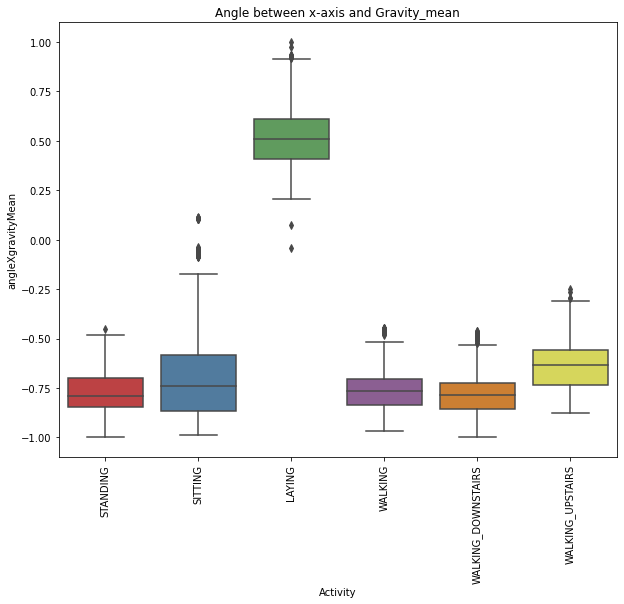

In [ ]:
# Box Plot of angleXgravityMean

plt.figure(figsize=(10,8))
sns.boxplot(x='Activity', y='angleXgravityMean', data=train_df)
plt.title('Angle between x-axis and Gravity_mean')
plt.xticks(rotation = 90)
plt.show()

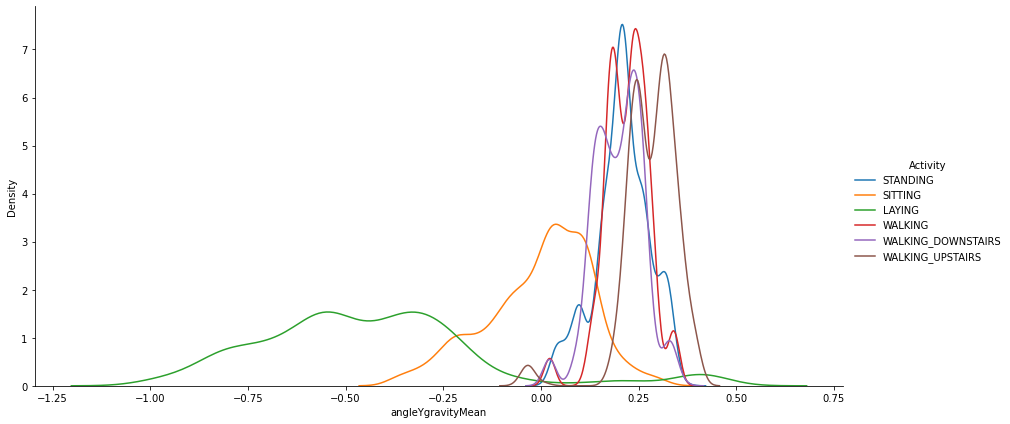

In [ ]:
# Line Plot including all activities of angleYgravityMean

facetgrid = sns.FacetGrid(train_df, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'angleYgravityMean', hist=False).add_legend()
plt.show()

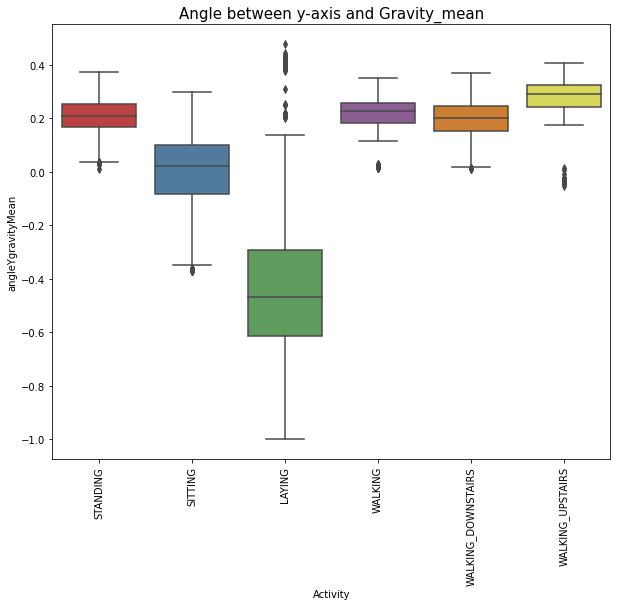

In [ ]:
# Box Plot of angleYgravityMean
plt.figure(figsize=(10,8))
sns.boxplot(x='Activity', y='angleYgravityMean', data = train_df)
plt.title('Angle between y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

OBSERVATION
1. If angleX,gravityMean > 0 then Activity is Laying.
2. If angleY,gravityMean < 0.2 then Activity is Laying

### Multi Variate Analysis
Since we have 561 feature, we can apply dimensionality reduction technique such as PCA or t-sne for better visualisation in 2D format

#### Applying T-sne

In [ ]:
from sklearn.manifold import TSNE

def perform_tsne(x_data, y_data, perplexities, n_iter=1000):
        
    for i,perplexity in enumerate(perplexities):
        print('\nperforming tsne with perplexity {} and with {} iterations '.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(x_data)
        print('Tsne Session Done..')
        
        # prepare the data for seaborn         
        print('Creating dataframe for  t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and iteration : {}".format(perplexity, n_iter))
        plt.show()


performing tsne with perplexity 5 and with 1000 iterations 
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 2.538s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.106s
[t-SNE] Iteration 50: error = 114.1025543, gradient norm = 0.0197218 (50 iterations in 4.201s)
[t-SNE] Iteration 100: error = 97.5474091, gradient norm = 0.0157606 (50 iterations in 2.331s

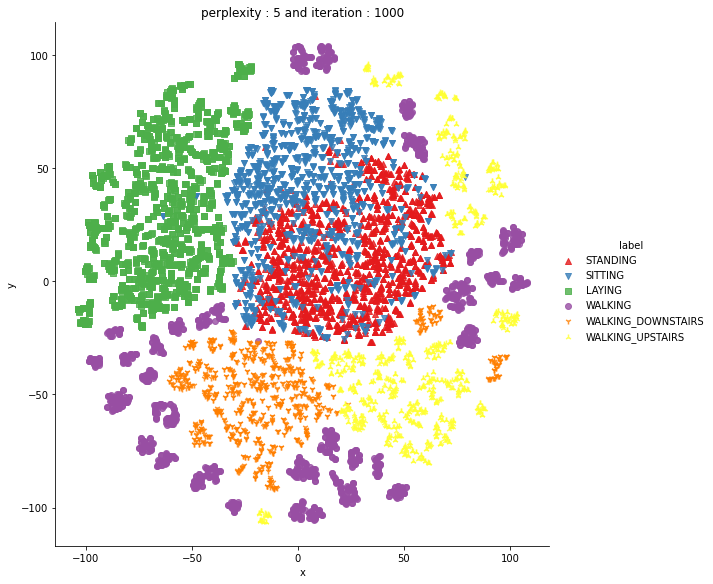


performing tsne with perplexity 10 and with 1000 iterations 
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 1.644s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.109s
[t-SNE] Iteration 50: error = 105.9659348, gradient norm = 0.0165897 (50 iterations in 3.389s)
[t-SNE] Iteration 100: error = 90.5700989, gradient norm = 0.0101834 (50 iterations in 2.451

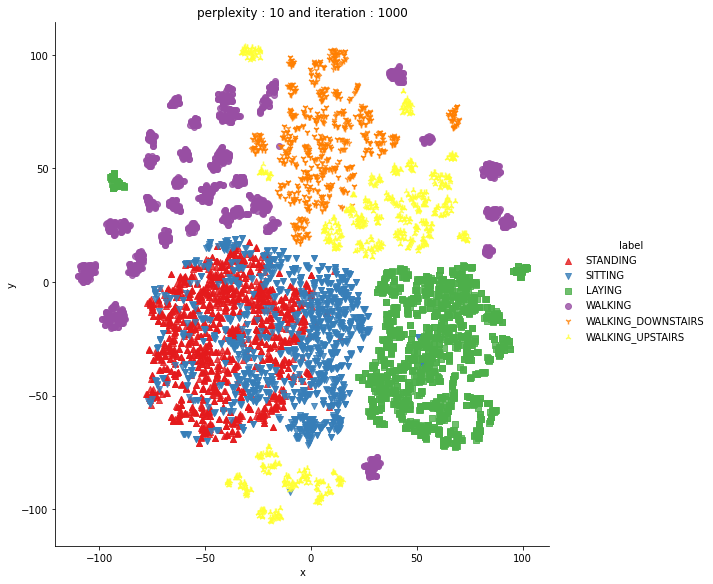


performing tsne with perplexity 20 and with 1000 iterations 
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 1.710s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.214s
[t-SNE] Iteration 50: error = 96.5673218, gradient norm = 0.0294451 (50 iterations in 3.096s)
[t-SNE] Iteration 100: error = 83.8743134, gradient norm = 0.0067586 (50 iterations in 2.481s

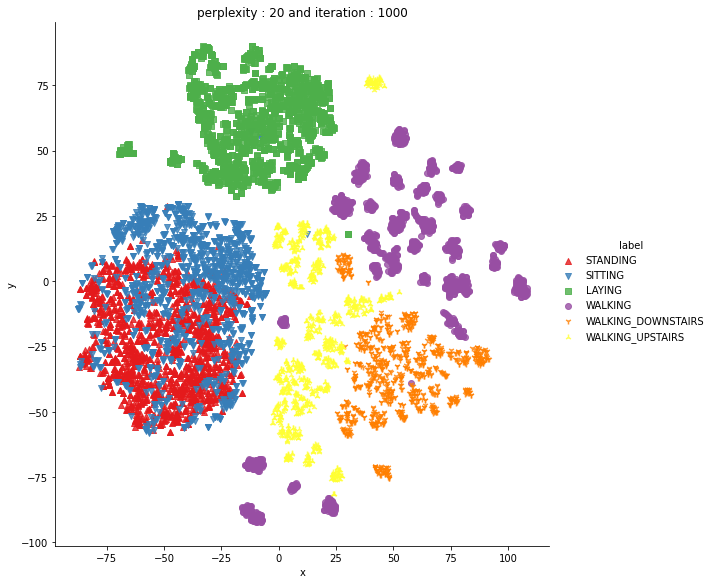

In [ ]:
x_tsne = train_df.drop(['subject', 'Activity'], axis=1)
y_tsne = train_df['Activity']
perform_tsne(x_tsne,y_tsne, perplexities =[5,10,20])

OBSERVATION
* There is an overlap between standing and sitting activity which will led to 
confusion during classification

## TASK 2
Implement ML models and suggest the best model with high prediction accuracy.

### Model Building

In [ ]:
# Splitting of X_train , y_train , X_test, y_test
X_train = train_df.drop(['subject', 'Activity'], axis=1)
y_train = train_df.Activity

X_test = test_df.drop(['subject', 'Activity'], axis=1)
y_test = test_df.Activity

In [ ]:
y_train.shape, y_test.shape

((7352,), (2947,))

In [ ]:
from datetime import datetime
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

def model_operations(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True,  cm_cmap=plt.cm.OrRd):
    results = dict()
    
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time - {}\n'.format(results['training_time']))
    
    
    # predict test data
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('testing time - {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('------------------ ACCURACY --------------------------------------')
    print('\n    {}\n\n'.format(accuracy))
    
     
    # classification report
    print('-------------------- CLASSIFICATION REPORT ------------------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)

    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    print('----------------------- CONFUSION MATRIX ---------------------------------')
    print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, title=' confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [ ]:
import itertools
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.OrRd):
   
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def print_grid_search_attributes(model):
    print('-------------------- Best Estimator ------------------------------------')
    print('{}\n'.format(model.best_estimator_))

    print('-------------------- Best parameters ------------------------------------')
    print('Parameters of best estimator : {}\n'.format(model.best_params_))

    print('--------------------   No of CrossValidation sets ------------------------------------')
    print('Total numbre of cross validation sets: {}\n'.format(model.n_splits_))

    print('--------------------    Best Score ------------------------------------')
    print('Average Cross Validate scores of best estimator : {}\n'.format(model.best_score_))

### We have high dimensional data, therefore linear model and svm works very well

Fitting 5 folds for each of 12 candidates, totalling 60 fits
training_time - 0:00:58.004566

testing time - 0:00:00.017752

------------------ ACCURACY --------------------------------------

    0.9582626399728538


-------------------- CLASSIFICATION REPORT ------------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

----------------------- CONFUSION MATRIX ---------------------------------

 [[537   0   0   0   0  

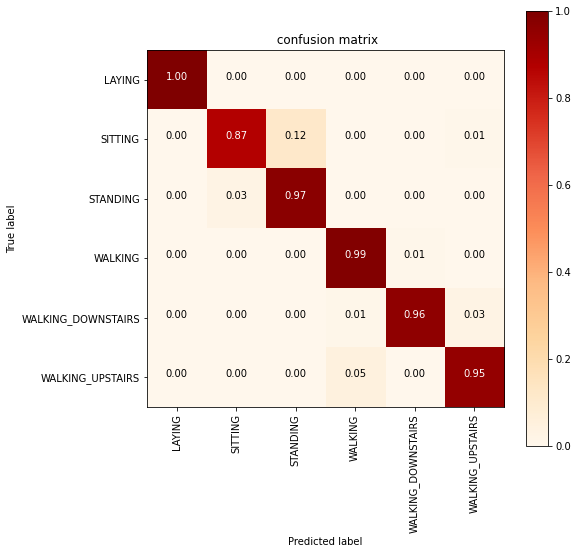

In [ ]:
# Logistic Regression
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, verbose=1, n_jobs=-1)
log_reg_grid_results =  model_operations(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(log_reg_grid_results['model'])

-------------------- Best Estimator ------------------------------------
LogisticRegression(C=1)

-------------------- Best parameters ------------------------------------
Parameters of best estimator : {'C': 1, 'penalty': 'l2'}

--------------------   No of CrossValidation sets ------------------------------------
Total numbre of cross validation sets: 5

--------------------    Best Score ------------------------------------
Average Cross Validate scores of best estimator : 0.933495007792376



Fitting 5 folds for each of 12 candidates, totalling 60 fits
training_time - 0:01:31.385972

testing time - 0:00:00.014013

------------------ ACCURACY --------------------------------------

    0.9667458432304038


-------------------- CLASSIFICATION REPORT ------------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947

----------------------- CONFUSION MATRIX ---------------------------------

 [[537   0   0   0   0  

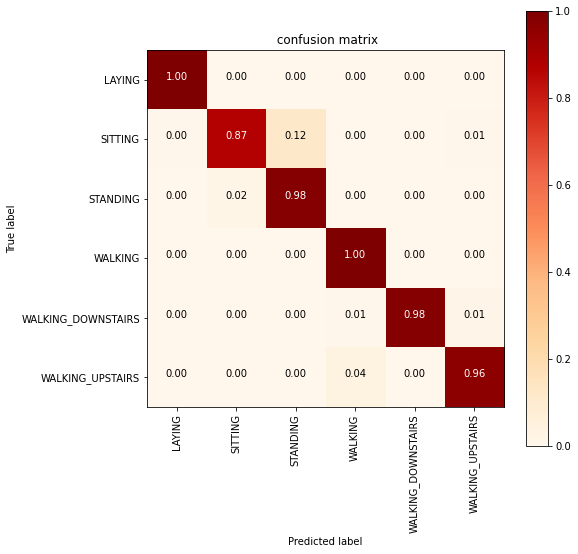

In [ ]:
# Linear SVC

from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16],'penalty':['l2','l1']}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = model_operations(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(lr_svc_grid_results['model'])

-------------------- Best Estimator ------------------------------------
LinearSVC(C=0.5, tol=5e-05)

-------------------- Best parameters ------------------------------------
Parameters of best estimator : {'C': 0.5, 'penalty': 'l2'}

--------------------   No of CrossValidation sets ------------------------------------
Total numbre of cross validation sets: 5

--------------------    Best Score ------------------------------------
Average Cross Validate scores of best estimator : 0.9423364179118282



training_time - 0:07:36.542314

testing time - 0:00:01.408891

------------------ ACCURACY --------------------------------------

    0.9626739056667798


-------------------- CLASSIFICATION REPORT ------------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

----------------------- CONFUSION MATRIX ---------------------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [ 

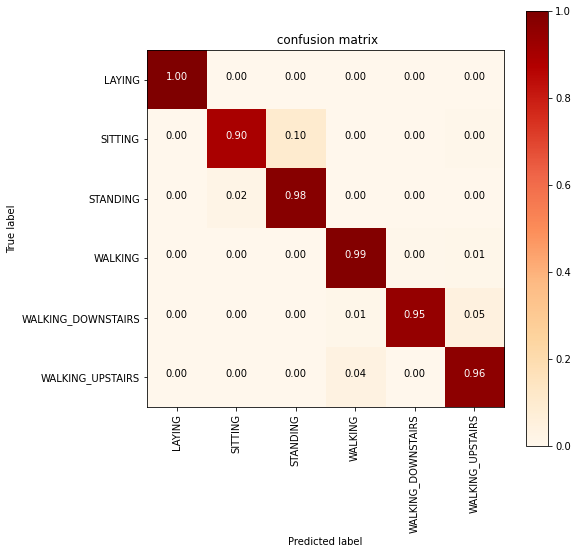

In [ ]:
# SVC
from sklearn.svm import SVC
parameters = {'C':[2,8,16],
              'gamma': [ 0.0078125, 0.125, 2],
              'kernel':['linear','rbf']}
rbf_svm = SVC()
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = model_operations(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

-------------------- Best Estimator ------------------------------------
SVC(C=16, gamma=0.0078125)

-------------------- Best parameters ------------------------------------
Parameters of best estimator : {'C': 16, 'gamma': 0.0078125, 'kernel': 'rbf'}

--------------------   No of CrossValidation sets ------------------------------------
Total numbre of cross validation sets: 5

--------------------    Best Score ------------------------------------
Average Cross Validate scores of best estimator : 0.9447834551903698



training_time - 0:02:19.442835

testing time - 0:00:10.889904

------------------ ACCURACY --------------------------------------

    0.9046487953851374


-------------------- CLASSIFICATION REPORT ------------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.79      0.85       491
          STANDING       0.83      0.94      0.89       532
           WALKING       0.84      0.98      0.91       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947

----------------------- CONFUSION MATRIX ---------------------------------

 [[535   1   1   0   0   0]
 [  0 389  98   0   0   4]
 [  0  31 501   0   0   0]
 [ 

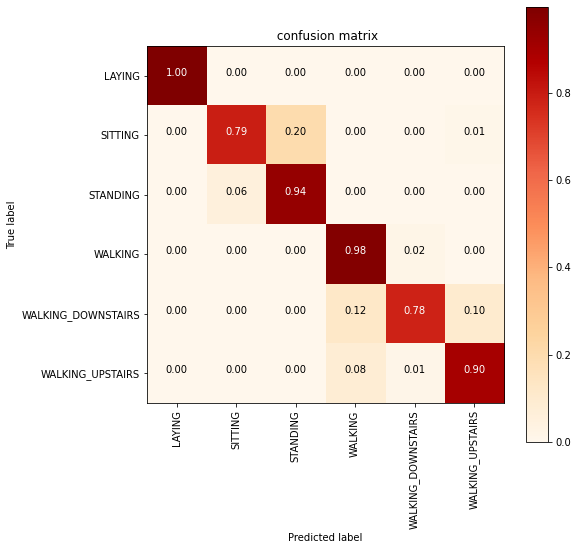

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
parameters={'n_neighbors':[5,10,15],
            'algorithm':['ball_tree','kd_tree']}
knn=KNeighborsClassifier()
knn_grid = GridSearchCV(knn,param_grid=parameters, n_jobs=-1)
knn_grid_results = model_operations(knn_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(knn_grid_results['model'])

-------------------- Best Estimator ------------------------------------
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=15)

-------------------- Best parameters ------------------------------------
Parameters of best estimator : {'algorithm': 'ball_tree', 'n_neighbors': 15}

--------------------   No of CrossValidation sets ------------------------------------
Total numbre of cross validation sets: 5

--------------------    Best Score ------------------------------------
Average Cross Validate scores of best estimator : 0.9023433547450251



training_time - 0:00:32.492969

testing time - 0:00:00.015372

------------------ ACCURACY --------------------------------------

    0.9504580929759077


-------------------- CLASSIFICATION REPORT ------------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.85      0.91       491
          STANDING       0.88      0.98      0.93       532
           WALKING       0.92      0.99      0.95       496
WALKING_DOWNSTAIRS       0.98      0.97      0.98       420
  WALKING_UPSTAIRS       0.98      0.90      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947

----------------------- CONFUSION MATRIX ---------------------------------

 [[537   0   0   0   0   0]
 [  0 416  73   0   0   2]
 [  0  11 521   0   0   0]
 [ 

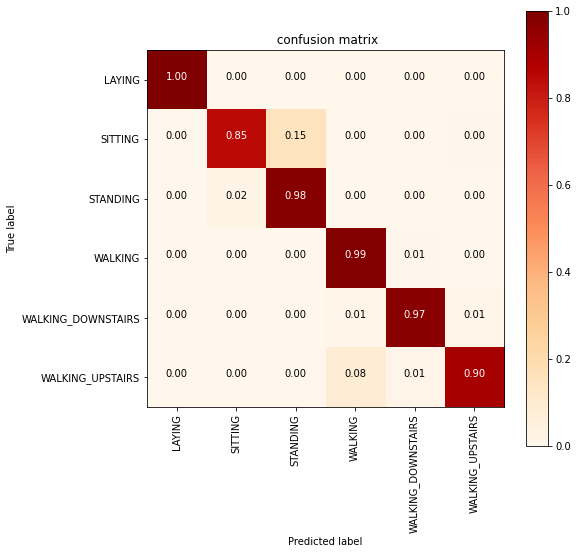

In [ ]:
# SGD CLASSIFIER
from sklearn.linear_model import SGDClassifier
parameters={'penalty':['l2','l1'],'loss':['hinge','log']}
sgdc=SGDClassifier(alpha=0.000001)
sgdc_grid=GridSearchCV(sgdc,param_grid=parameters, n_jobs=-1)
sgdc_grid_results = model_operations(sgdc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(sgdc_grid_results['model'])

-------------------- Best Estimator ------------------------------------
SGDClassifier(alpha=1e-06, loss='log', penalty='l1')

-------------------- Best parameters ------------------------------------
Parameters of best estimator : {'loss': 'log', 'penalty': 'l1'}

--------------------   No of CrossValidation sets ------------------------------------
Total numbre of cross validation sets: 5

--------------------    Best Score ------------------------------------
Average Cross Validate scores of best estimator : 0.9345834431665256



training_time - 0:00:31.157055

testing time - 0:00:00.009887

------------------ ACCURACY --------------------------------------

    0.8741092636579573


-------------------- CLASSIFICATION REPORT ------------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.75      0.80       491
          STANDING       0.80      0.88      0.84       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.90      0.84      0.87       420
  WALKING_UPSTAIRS       0.87      0.80      0.83       471

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

----------------------- CONFUSION MATRIX ---------------------------------

 [[537   0   0   0   0   0]
 [  0 370 121   0   0   0]
 [  0  62 470   0   0   0]
 [ 

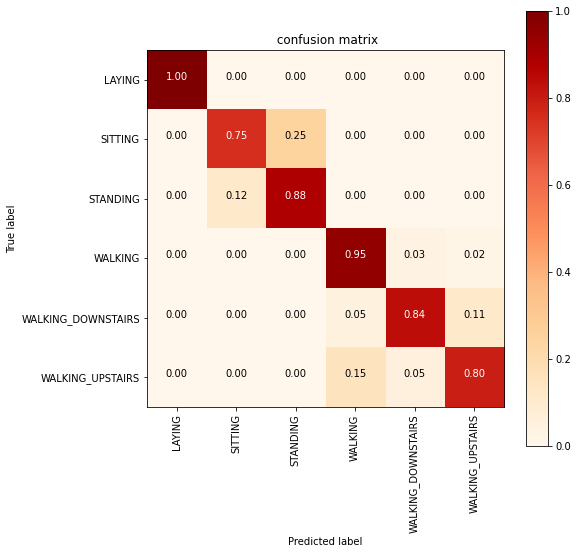

In [ ]:
# Decision Tress
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = model_operations(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)


In [ ]:
print_grid_search_attributes(dt_grid_results['model'])

-------------------- Best Estimator ------------------------------------
DecisionTreeClassifier(max_depth=9)

-------------------- Best parameters ------------------------------------
Parameters of best estimator : {'max_depth': 9}

--------------------   No of CrossValidation sets ------------------------------------
Total numbre of cross validation sets: 5

--------------------    Best Score ------------------------------------
Average Cross Validate scores of best estimator : 0.8520228268057733



training_time - 0:12:05.181313

testing time - 0:00:00.040650

------------------ ACCURACY --------------------------------------

    0.9389209365456397


-------------------- CLASSIFICATION REPORT ------------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.85      0.89       491
          STANDING       0.87      0.94      0.91       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.97      0.92      0.95       420
  WALKING_UPSTAIRS       0.93      0.93      0.93       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947

----------------------- CONFUSION MATRIX ---------------------------------

 [[537   0   0   0   0   0]
 [  0 417  71   0   0   3]
 [  0  31 501   0   0   0]
 [ 

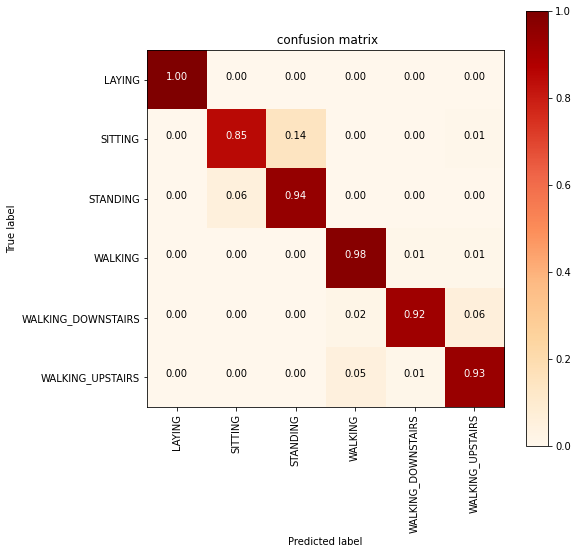

In [ ]:
# GBDT
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier()
gbdt_grid_results = model_operations(gbdt, X_train, y_train, X_test, y_test, class_labels=labels)

training_time - 0:00:33.294429

testing time - 0:00:00.107693

------------------ ACCURACY --------------------------------------

    0.9589412962334578


-------------------- CLASSIFICATION REPORT ------------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

----------------------- CONFUSION MATRIX ---------------------------------

 [[537   0   0   0   0   0]
 [  0 432  56   0   0   3]
 [  0  14 518   0   0   0]
 [ 

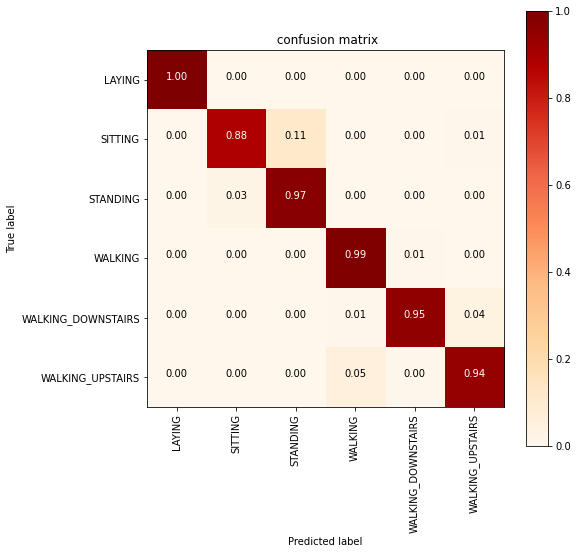

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=linear_model.LogisticRegression(),n_estimators=10, random_state=0)
bag_results = model_operations(bag, X_train, y_train, X_test, y_test, class_labels=labels)

### ANN Model

In [ ]:
X_train.sample()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagenergy,fBodyBodyAccJerkMagiqr,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
2134,0.275923,-0.017593,-0.107578,-0.996641,-0.994231,-0.991569,-0.996664,-0.994138,-0.992369,-0.943331,-0.571703,-0.814623,0.849356,0.69444,0.848094,-0.996653,-0.99998,-0.999971,-0.999853,-0.996129,-0.993885,-0.991274,-0.701819,-0.710539,-0.572779,0.12199,-0.133595,0.145859,0.077926,0.005604,0.144016,-0.076747,0.318191,0.201272,0.011835,-0.012066,-0.053747,0.003592,-0.175069,-0.311667,...,-0.999942,-0.995735,-1.0,-0.936508,0.660598,-0.761291,-0.950431,-0.998296,-0.998147,-0.998011,-0.997587,-0.994114,-0.998296,-0.999992,-0.996748,-1.0,-1.0,0.471765,-0.523225,-0.756254,-0.998374,-0.998481,-0.998478,-0.998202,-0.998603,-0.998374,-0.999994,-0.997928,-1.0,-0.968254,0.465588,-0.486577,-0.717998,0.456891,0.105099,0.257433,-0.120459,0.326658,-0.820052,-0.006015


In [ ]:
y_train.head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
dummy_y[:5]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

num_class=6

input_layer = Input(shape=(X_train.shape[1],),name='Input_Layer')
dense_1=Dense(units=64,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='dense_1')(input_layer)
dense_2=Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='dense_2')(dense_1)
dense_3=Dense(units=16,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='dense_3')(dense_2)
Out=Dense(units=num_class,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='out')(dense_3)

model = Model(inputs=input_layer,outputs=Out)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 561)]             0         
                                                                 
 dense_1 (Dense)             (None, 64)                35968     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 out (Dense)                 (None, 6)                 102       
                                                                 
Total params: 38,678
Trainable params: 38,678
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True)
history = model.fit(X_train,
                    dummy_y,
                    callbacks=[es],
                    epochs=30, 
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/30
589/589 [==============================] - 4s 6ms/step - loss: 0.4757 - accuracy: 0.8017 - val_loss: 0.3558 - val_accuracy: 0.8498
Epoch 2/30
589/589 [==============================] - 3s 5ms/step - loss: 0.1827 - accuracy: 0.9213 - val_loss: 0.1380 - val_accuracy: 0.9368
Epoch 3/30
589/589 [==============================] - 3s 5ms/step - loss: 0.1393 - accuracy: 0.9435 - val_loss: 0.1853 - val_accuracy: 0.9266
Epoch 4/30
589/589 [==============================] - 3s 5ms/step - loss: 0.1179 - accuracy: 0.9510 - val_loss: 0.2355 - val_accuracy: 0.9307
Epoch 5/30
589/589 [==============================] - 3s 5ms/step - loss: 0.1001 - accuracy: 0.9600 - val_loss: 0.1517 - val_accuracy: 0.9409
Epoch 6/30
589/589 [==============================] - 3s 5ms/step - loss: 0.0935 - accuracy: 0.9631 - val_loss: 0.1931 - val_accuracy: 0.9334
Epoch 7/30
589/589 [==============================] - 3s 5ms/step - loss: 0.0881 - accuracy: 0.9674 - val_loss: 0.2002 - val_accuracy: 0.9232
Epoch 

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

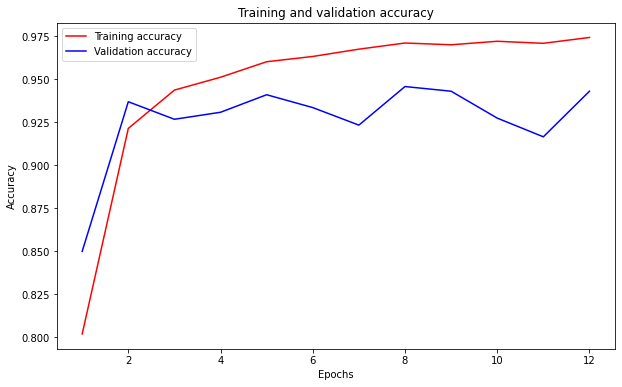

In [ ]:
x_range = range(1, len(acc) + 1)
plt.figure(figsize=(10,6))
plt.plot(x_range, acc, 'r', label='Training accuracy')
plt.plot(x_range, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

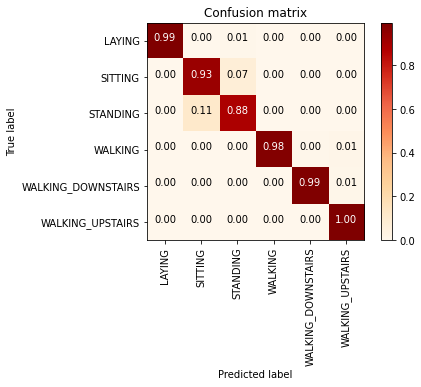

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X_train)
matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
plot_confusion_matrix(matrix,labels)

In [ ]:
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1407
           1       0.88      0.93      0.90      1286
           2       0.92      0.88      0.90      1374
           3       1.00      0.98      0.99      1226
           4       0.99      0.99      0.99       986
           5       0.98      1.00      0.99      1073

    accuracy                           0.96      7352
   macro avg       0.96      0.96      0.96      7352
weighted avg       0.96      0.96      0.96      7352



### Summary

In [ ]:
models_performance={'Logistic Regression' :log_reg_grid_results['accuracy'],
                    'Linear SVC':lr_svc_grid_results['accuracy'],
                    'rbf SVM Classifier':rbf_svm_grid_results['accuracy'] ,
                    'KNN Classifier':knn_grid_results['accuracy'],
                    'DecisionTree':dt_grid_results['accuracy'],
                    'Gradient Boosting DT':gbdt_grid_results['accuracy'],
                    'BaggingClassifier':bag_results['accuracy'],
                    'ANN':0.97}

summary_df= pd.DataFrame(models_performance.items(),columns=['Model','Performance'])
summary_df

,Model,Performance
0,Logistic Regression,0.958263
1,Linear SVC,0.966746
2,rbf SVM Classifier,0.962674
3,KNN Classifier,0.904649
4,DecisionTree,0.874109
5,Gradient Boosting DT,0.938921
6,BaggingClassifier,0.958941
7,ANN,0.970000


### CONCLUSION
1. As we observe the dataset using T-SNE, we found out that there is overlapping between standing and sitting activity. This overlapping made confusion for all most all models
2. As of comparing accuracy and also speed Linear SVC  and ANN models, perform much better than all other models